In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
gitt1 = pd.read_csv('gitt1.csv')

In [ ]:
plt.plot(gitt1['TestTime'], gitt1['Voltage/V'])
plt.plot(gitt1['TestTime'], gitt1[''])

In [12]:
gitt1['TestTime'][0].split('-')

AttributeError: 'list' object has no attribute 'split'

In [13]:
gitt1['TestTime'][1].split(':')

['0', '01', '00']

In [27]:
gitt1['TestTime'][10000].split('-')

['4', '06:21:07']

In [28]:
24*3600

86400

In [30]:
gitt1['TestTime'][10000].split('-')[1]

'06:21:07'

In [35]:
'-' not in gitt1['TestTime'][i].split('-')

True

In [41]:
# Cleaning up Kevin's Data

time = np.zeros(len(gitt1['TestTime']))

for i in range(len(gitt1['TestTime'])):
    if '-' not in gitt1['TestTime'][i]:
        hr = float(gitt1['TestTime'][i].split(':')[0]) * 3600
        mins = float(gitt1['TestTime'][i].split(':')[1]) * 60
        sec = float(gitt1['TestTime'][i].split(':')[2])
        time[i] = hr + mins + sec
    if '-' in gitt1['TestTime'][i]:
        #print(gitt1['TestTime'][i].split('-'))
        day = float(gitt1['TestTime'][i].split('-')[0])*86400
        idx2 = gitt1['TestTime'][i].split('-')[1]
        hr = float(idx2.split(':')[0]) * 3600
        mins = float(idx2.split(':')[1]) * 60
        sec = float(idx2.split(':')[2])
        time[i] = day + hr + mins+ sec

In [45]:
gitt1['Time(s)'] = pd.Series(time)

In [46]:
gitt1.head()

,TestTime,Voltage/V,Current/mA,Time(s)
0,0:00:00,3.0630,0.000,0.0
1,0:01:00,3.0630,0.000,60.0
2,0:01:00,2.6600,-0.049,60.0
3,0:02:00,2.3069,-0.050,120.0
4,0:03:00,2.1261,-0.049,180.0


In [57]:
time = np.array(gitt1['Time(s)'])
voltage = np.array(gitt1['Voltage/V'])
current = np.array(gitt1['Current/mA'])

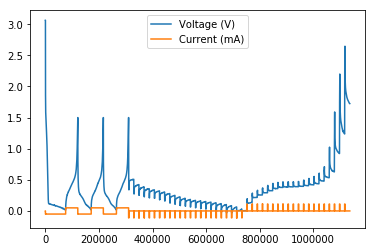

In [60]:
plt.plot(time, voltage, label = 'Voltage (V)')
plt.plot(time, current, label = 'Current (mA)')
plt.legend()
plt.show()